# SafeNSound: Initial Log Scaled Mel-Spectrogram Development

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import librosa as lb
import librosa.display as ld
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import sounddevice as sd
from sklearn.model_selection import train_test_split

## 2. Datasets

In [6]:
PATH = "datasets/placeholder/"
EMERGENCY_PATH = os.path.join(PATH, "emergency/")
NORMAL_PATH = os.path.join(PATH, "normal/")

def load_audio_files(directory, filename):
    if not os.path.exists(directory):
        raise FileNotFoundError(f"Directory {directory} does not exist.")

    if filename.endswith('.wav'):
        file_path = os.path.join(directory, filename)
        try:
            wav, sr = lb.load(file_path, sr=16000, mono=True)
            ##wav = tf.convert_to_tensor(wav, dtype=tf.float32)
        except Exception as e:
            print(f"Error loading {file_path}: {e}")
    return wav, sr

#get audio real-time
## def record_audio(duration=5, sample_rate=16000):


emergencywav = 'XC3776-1.wav'
normalwav = 'sparrow-sound-effect-4.wav'

wav, sr = load_audio_files(EMERGENCY_PATH, emergencywav)

## 3. Creating Mel Spectrogram & converting to Log Scale

In [7]:
S = lb.feature.melspectrogram(
    y=wav, 
    sr=sr, 
    n_fft=1024,
    hop_length=512,
    n_mels=128
)

S_dB = lb.power_to_db(S, ref=np.max)

## 4. Display Log-scaled Mel Spectrogram

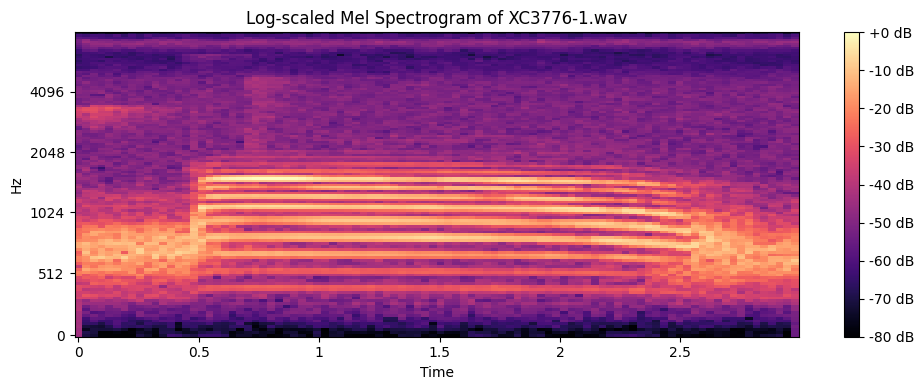

In [8]:
plt.figure(figsize=(10, 4))
lb.display.specshow(S_dB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format="%+2.0f dB")
plt.title("Log-scaled Mel Spectrogram of " + emergencywav)
plt.tight_layout()
plt.show()